## Problem Set 04B - Knapsack Problem con Simulated Annealing

Resolveremos el mismo problema del Problem Set anterior pero con Simulated Annealing

### Ejercicio 1: Completa las funciones de costo e inicialización como lo hiciste en el problem set anterior. Crea la función `KS_neighbour`

In [11]:
def KS_isvalid(solution, object_volumes, KS_volume):
    return np.sum(solution*object_volumes)<=KS_volume

def KS_initialize_population(n_individuals, object_volumes, KS_volume):
    population =[]
    volumes_idx_sorted =np.argsort(object_volumes)
    volumes_sorted = list(map(lambda x: object_volumes[x], list(filter(lambda x: object_volumes[x]<=KS_volume, volumes_idx_sorted))))  
    num_item_Valid = len(volumes_sorted)
    for individual in range(n_individuals):
        solution= np.zeros(len(object_volumes))
        num_item= np.random.choice(num_item_Valid, 1)
        idx_item= np.random.choice(num_item_Valid, num_item,replace = False)
        acum_vol = 0
        for ID_item in idx_item:
            if acum_vol + volumes_sorted[ID_item]<=KS_volume:  
                acum_vol+= volumes_sorted[ID_item]
                solution[volumes_idx_sorted[ID_item]]=1
        population.append(solution)
    return np.array(population)


def KS_cost(solution, object_values, object_volumes, KS_volume):
    vmax = np.sum(object_values)
    sx=np.sum(solution*object_volumes)
    cost= vmax
    if(sx<=KS_volume):
        cost = vmax- np.sum(solution*object_values)
    return cost

def KS_neighbour(solution, object_volumes, KS_volume):
    # TU CODIGO AQUI    
    neighbor= np.copy(solution) # copia de la solucion la cual será mutada
    unos, = np.where(neighbor == 1)
    ceros, = np.where(neighbor == 0)
    if np.random.uniform(0, 1)<0.5:
        # agregamos un objeto
        volumes_idx_sorted =np.argsort(object_volumes)
        sx = np.sum(neighbor*object_volumes)
        idx_sorted_valid = list(filter(lambda x: object_volumes[x]+sx<=KS_volume, volumes_idx_sorted))
        inter = np.intersect1d(idx_sorted_valid,ceros)
        if (len(inter)!=0):
            idx_Estochastic = np.random.choice(inter,1)[0]
            neighbor[idx_Estochastic]=1
            return neighbor
        #si no retorna significa que los posibles valores de volumenes que podemos agregar ya son unos
        # por lo tanto recurrimos a quitar un valor
        
    #quitamos un objeto
    minor = np.inf
    idx = np.inf
    if(len(unos)!=0):
        idx_Estochastic = np.random.choice(unos,1)[0]
        neighbor[idx_Estochastic]=0
    return neighbor

### Ejercicio 2: Define las condiciones iniciales del problema KS como en el Problem Set anterior

In [12]:
%run code/sa.py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_objects         = 50 
KS_volume         = 30

max_object_value  = 100
max_object_volume = 50

object_values  = np.random.randint(max_object_value-1, size=n_objects)+1
object_volumes = np.random.randint(max_object_volume-1, size=n_objects)+1


print ("total volume of objects", np.sum(object_volumes))
print ("knapsack max volume    ", KS_volume)
print ("total value of objects ", np.sum(object_values))

print (object_values)
print (object_volumes)

total volume of objects 1508
knapsack max volume     30
total value of objects  2752
[32  7 97 97 18 51 11 42 95 49 76 14 55 26 14 97 45 22 25 75 54 63 62 48 95
 60 39 30 40 96 81 80 97 53 67 77 61 51 86  6 56 69  7 20 79 97  7 92 38 93]
[29 18 20 48  2 27 24 18 18 44 26 28 42 40 20 30 47 26 18 46 44  7 37 25 37
  5 21 24 48 34 48 36 45 30 46 33 30 36  5 20 25 26 48 31  8 47 39 32 29 41]


### Ejercicio 3: Ejecuta el algoritmo con:

- 10 individuos y 50 pasos de enfriamiento
- 100 individuos y 500 pasos de enfriamiento
- 100 individuos y 5000 pasos de enfriamiento

best knapsack is [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.] cost 2446.0 value 306.0 volume 27.0


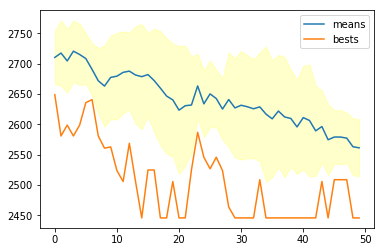

In [15]:
%run code/sa.py

n_individuals   = 10
n_cooling_steps = 50


bestsol, bests, means, stds = run_sa(n_individuals              = n_individuals,
                                     n_cooling_steps            = n_cooling_steps,
                                     init_population_function   = lambda x: KS_initialize_population(x, object_volumes, KS_volume),
                                     cost_function              = lambda x: KS_cost(x, object_values, object_volumes, KS_volume),
                                     generate_neighbor_function = lambda x: KS_neighbour(x,object_volumes=object_volumes, KS_volume=KS_volume))

print ("best knapsack is", bestsol, "cost", np.min(bests), "value", np.sum(bestsol*object_values), "volume", np.sum(bestsol*object_volumes))
plot_evolution(bests, means, stds)

best knapsack is [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.] cost 2446.0 value 306.0 volume 27.0


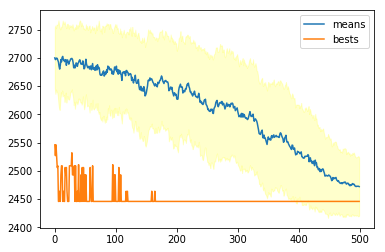

In [17]:
%run code/sa.py

n_individuals   = 100
n_cooling_steps = 500


bestsol, bests, means, stds = run_sa(n_individuals              = n_individuals,
                                     n_cooling_steps            = n_cooling_steps,
                                     init_population_function   = lambda x: KS_initialize_population(x, object_volumes, KS_volume),
                                     cost_function              = lambda x: KS_cost(x, object_values, object_volumes, KS_volume),
                                     generate_neighbor_function = lambda x: KS_neighbour(x,object_volumes=object_volumes, KS_volume=KS_volume))

print ("best knapsack is", bestsol, "cost", np.min(bests), "value", np.sum(bestsol*object_values), "volume", np.sum(bestsol*object_volumes))
plot_evolution(bests, means, stds)

best knapsack is [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.] cost 2446.0 value 306.0 volume 27.0


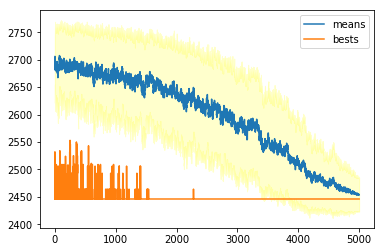

In [18]:
%run code/sa.py

n_individuals   = 100
n_cooling_steps = 5000


bestsol, bests, means, stds = run_sa(n_individuals              = n_individuals,
                                     n_cooling_steps            = n_cooling_steps,
                                     init_population_function   = lambda x: KS_initialize_population(x, object_volumes, KS_volume),
                                     cost_function              = lambda x: KS_cost(x, object_values, object_volumes, KS_volume),
                                     generate_neighbor_function = lambda x: KS_neighbour(x,object_volumes=object_volumes, KS_volume=KS_volume))

print ("best knapsack is", bestsol, "cost", np.min(bests), "value", np.sum(bestsol*object_values), "volume", np.sum(bestsol*object_volumes))
plot_evolution(bests, means, stds)

[36 20 47 53 55 46 48 66  1  6 13 59 95  7 54 32 76 63 76 19  2 17 16 12 78
 67 44 20 41 26 24 68 55 53 35 49 46 46 16 64 41 27  8 30 76 92 85 81 84 98]
[ 8 47 16  8 41 11 45 34 26 48 16  8 10 13 28  6  7 11  8 27 44 30 25 23 45
  3 12 12 23  3 37 10 47 46 27 10 30  8  2 47  4 44 43 37 22 20  1 17 42 27]
total volume of objects 1159
knapsack max volume     100
total value of objects  2273
best knapsack is [ 1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  1.
  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.  1.
  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.] cost 1495.0 value 778.0 volume 97.0
best knapsack is [0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 1 0 0] cost 1486 value 787 volume 100
Best gender Algorithm is GA


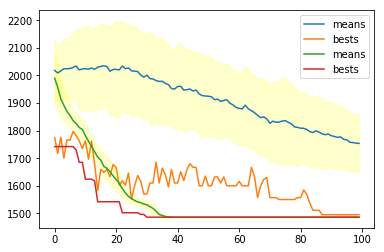

In [26]:
def KS_mutate(solution, mutation_prob, object_volumes, KS_volume):
    # TU CODIGO AQUI
    """
    TODO: add max value optimization, in that code just minimize the volume
    """
    
    mutated_solution = np.copy(solution) # copia de la solucion la cual será mutada

    if np.random.random()<mutation_prob:
        sx = np.sum(solution*object_volumes)
        volumes_idx_sorted =np.argsort(-object_volumes)
        mutation_flag = False
        #volumes_sorted = list(map(lambda x: object_volumes[x], list(filter(lambda x: object_volumes[x]<=KS_volume, volumes_idx_sorted))))  
        unos, = np.where(mutated_solution == 1)
        for idx_vol in volumes_idx_sorted:
            if(object_volumes[idx_vol]+sx<=KS_volume):
                mutated_solution[idx_vol]=1
                mutation_flag=True
                return mutated_solution
            
        if not mutation_flag:
            minor = 999999999
            idx = 9999999999
            for un in unos:
                if( object_volumes[un]<minor):
                    minor = object_volumes[un]
                    idx = un
            mutated_solution[idx]=0
            
    return mutated_solution

def KS_cross_over(solution1, solution2):
    l = len(solution1)
    cstart = np.random.randint(l)
    cend   = np.random.randint(l-cstart)+cstart+1

    r = np.zeros(l).astype(int)
    r[:cstart]     = solution1[:cstart]
    r[cstart:cend] = solution2[cstart:cend]
    r[cend:]       = solution1[cend:]            
    return r
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%run code/sa.py
%run code/ga.py

n_individuals   = 50
n_objects       = 50
n_cooling_steps = 100
KS_volume       = 100
mutation_prob   = 0.1
crossover_prob  = 0.5

object_values  = np.array([36, 20, 47, 53, 55, 46, 48, 66,  1,  6, 13, 59, 95,  7, 54, 32, 76, 63, 76, 19,  2, 17, 16, 12, 78,
 67, 44, 20, 41, 26, 24, 68, 55, 53, 35, 49, 46, 46, 16, 64, 41, 27,  8, 30, 76, 92, 85, 81, 84, 98])
object_volumes = np.array([ 8, 47, 16,  8, 41, 11, 45, 34, 26, 48, 16,  8, 10, 13, 28,  6,  7, 11,  8, 27, 44, 30, 25, 23, 45,
  3, 12, 12, 23,  3, 37, 10, 47, 46, 27, 10, 30,  8,  2, 47,  4, 44, 43, 37, 22, 20,  1, 17, 42, 27])

print (object_values)
print (object_volumes)

print ("total volume of objects", np.sum(object_volumes))
print ("knapsack max volume    ", KS_volume)
print ("total value of objects ", np.sum(object_values))

bestsol, bests, means, stds = run_sa(n_individuals              = n_individuals,
                                     n_cooling_steps            = n_cooling_steps,
                                     init_population_function   = lambda x: KS_initialize_population(x, object_volumes, KS_volume),
                                     cost_function              = lambda x: KS_cost(x, object_values, object_volumes, KS_volume),
                                     generate_neighbor_function = lambda x: KS_neighbour(x,object_volumes=object_volumes, KS_volume=KS_volume))

print ("best knapsack is", bestsol, "cost", np.min(bests), "value", np.sum(bestsol*object_values), "volume", np.sum(bestsol*object_volumes))
plot_evolution(bests, means, stds)

r =  run_ga(   pop_size                 =n_individuals, 
               init_population_function = lambda x: KS_initialize_population(x, object_volumes, KS_volume), 
               mutation_function        = lambda x,y: KS_mutate(x, y, object_volumes, KS_volume), 
               crossover_function       = KS_cross_over,
               cost_function            = lambda x: KS_cost(x, object_values, object_volumes, KS_volume), 
               crossover_prob           = crossover_prob,
               mutation_prob            = mutation_prob, 
               n_iters                  = n_cooling_steps)

best, best_costs, means, stds = r
print ("best knapsack is", best, "cost", np.min(best_costs), "value", np.sum(best*object_values), "volume", np.sum(best*object_volumes))
plot_evolution(best_costs, means, stds)

# The best Algorithm from GA, SA
index = np.argmin([np.min(best_costs),np.min(bests)])
Algorithms = {0: 'GA', 1: 'SA'}
print('Best gender Algorithm is {}'.format(Algorithms[index]))